In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load data

In [2]:
df = pd.read_csv('fp_pred.csv')

In [3]:
df.head()

,Unnamed: 0,player_id,game_id,game_date,reb,reb_pred,player_name,team,pts,pts_pred,...,blk,blk_pred,to,to_pred,fp_fanduel,fp_fanduel_pred,fp_yahoo,fp_yahoo_pred,fp_draftkings,fp_draftkings_pred
0,0,202324,22000743,2021-04-02,5.0,5.894968,Derrick Favors,UTA,4.0,4.727058,...,2.0,1.742050,0.0,0.462477,19.0,19.323977,19.0,19.323977,16.25,17.626077
1,1,1629671,22000743,2021-04-02,0.0,0.508486,Miye Oni,UTA,0.0,1.523207,...,0.0,0.115687,0.0,0.045665,0.0,3.469601,0.0,3.469601,0.00,3.247910
2,2,1627777,22000743,2021-04-02,3.0,1.491486,Georges Niang,UTA,3.0,4.696698,...,0.0,0.199984,1.0,0.426469,7.1,9.058756,7.1,9.058756,7.75,8.787013
3,3,203903,22000743,2021-04-02,2.0,3.424841,Jordan Clarkson,UTA,19.0,11.713884,...,0.0,0.013563,2.0,1.714314,23.9,18.226125,23.9,18.226125,24.00,18.822521
4,4,201144,22000743,2021-04-02,2.0,3.172887,Mike Conley,UTA,13.0,15.386163,...,1.0,0.366885,1.0,2.160271,27.9,28.870261,27.9,28.870261,26.50,28.659534


In [1]:
df.columns

NameError: name 'df' is not defined

# Summary statistics

In [4]:
df.describe()

,Unnamed: 0,player_id,game_id,reb,reb_pred,pts,pts_pred,ast,ast_pred,stl,...,blk,blk_pred,to,to_pred,fp_fanduel,fp_fanduel_pred,fp_yahoo,fp_yahoo_pred,fp_draftkings,fp_draftkings_pred
count,13443.000000,1.344300e+04,1.344300e+04,13443.000000,13443.000000,13443.000000,13443.000000,13443.000000,13443.000000,13443.000000,...,13443.000000,13443.000000,13443.000000,13443.000000,13443.000000,13443.000000,13443.000000,13443.000000,13443.000000,13443.000000
mean,6721.000000,1.121374e+06,2.612406e+07,3.229785,3.295490,8.197947,8.338648,1.793498,1.826181,0.548018,...,0.350294,0.389569,0.931489,0.960925,16.527382,16.990470,16.527382,16.990470,16.367217,16.714184
std,3880.804169,6.869742e+05,8.320885e+06,3.537261,2.739087,8.944564,7.183075,2.522282,1.991543,0.881532,...,0.740434,0.491455,1.323449,0.916828,15.757850,12.923600,15.757850,12.923600,15.719245,12.917276
min,0.000000,2.544000e+03,2.200014e+07,0.000000,-0.603213,0.000000,-2.141898,0.000000,-0.710882,0.000000,...,0.000000,-0.221829,0.000000,-0.340643,-3.000000,-0.531123,-3.000000,-0.531123,-1.500000,-0.506959
25%,3360.500000,2.034870e+05,2.200081e+07,0.000000,1.130990,0.000000,2.255494,0.000000,0.380496,0.000000,...,0.000000,0.032844,0.000000,0.267243,0.400000,5.495152,0.400000,5.495152,1.000000,5.341618
50%,6721.000000,1.628374e+06,2.200093e+07,2.000000,2.785010,6.000000,6.695951,1.000000,1.136573,0.000000,...,0.000000,0.222050,0.000000,0.703352,13.900000,15.272612,13.900000,15.272612,13.500000,14.910089
75%,10081.500000,1.629636e+06,2.200106e+07,5.000000,4.665752,13.000000,12.339778,3.000000,2.520015,1.000000,...,0.000000,0.544477,1.000000,1.325951,26.700000,25.172472,26.700000,25.172472,26.250000,24.472329
max,13442.000000,1.630466e+06,5.200021e+07,30.000000,16.069744,60.000000,35.987045,24.000000,16.633268,6.000000,...,9.000000,6.184145,9.000000,6.262998,96.400000,67.584857,96.400000,67.584857,98.250000,72.293558


In [5]:
plt.figure(figsize=(20, 12))
df.hist(bins=20, figsize=(20, 12), layout=(5, 4))
plt.tight_layout()
plt.show()

ValueError: Layout of 5x4 must be larger than required size 21

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

In [10]:
stat_cols = ['reb', 'reb_pred',
       'pts', 'pts_pred', 'ast', 'ast_pred', 'stl',
       'stl_pred', 'blk', 'blk_pred', 'to', 'to_pred', 'fp_fanduel',
       'fp_fanduel_pred', 'fp_yahoo', 'fp_yahoo_pred', 'fp_draftkings',
       'fp_draftkings_pred']

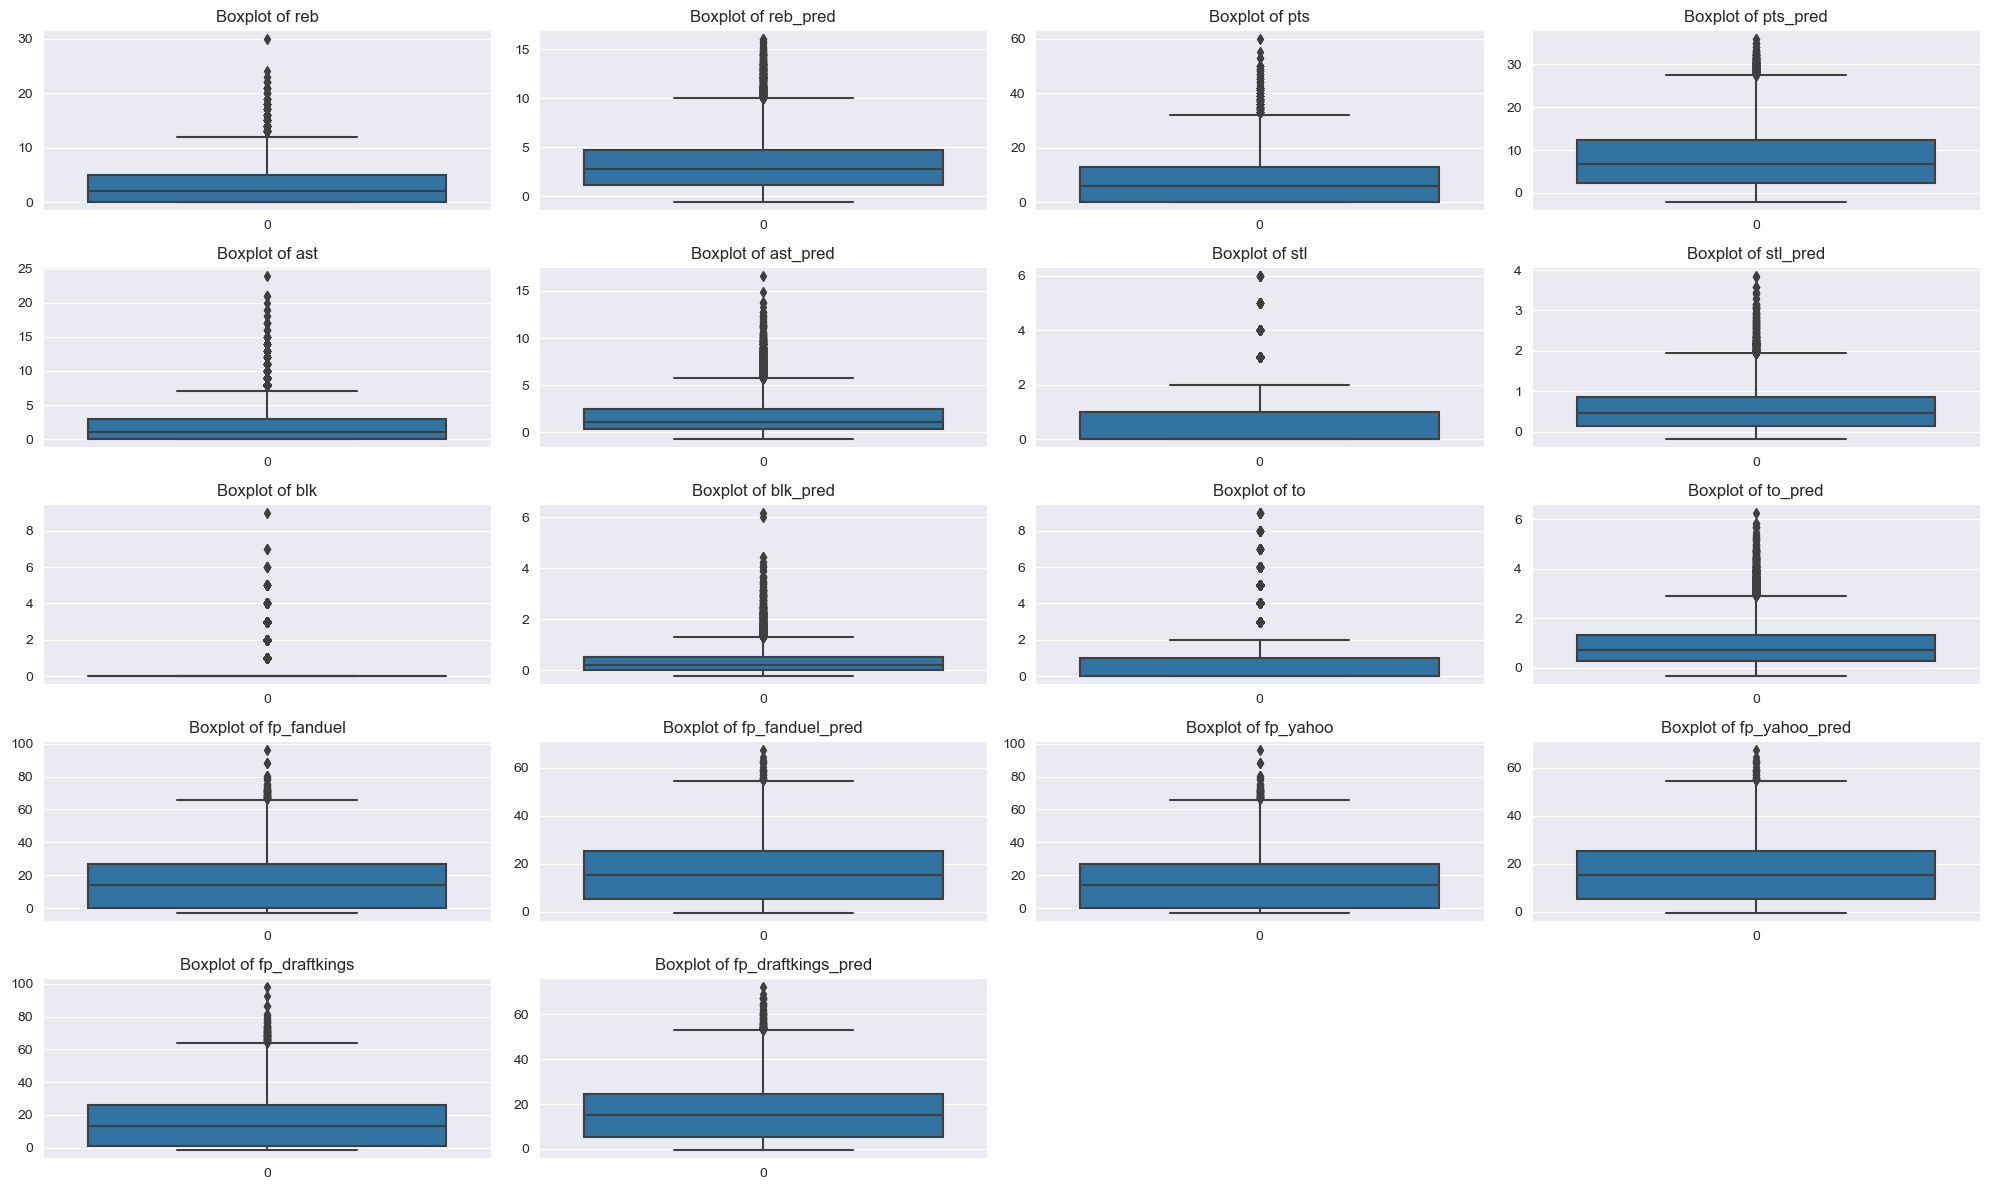

In [11]:
plt.figure(figsize=(20, 12))
for i, column in enumerate(stat_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


# Calcluate errors

In [12]:
# Calculate prediction errors
df['pts_error'] = abs(df['pts'] - df['pts_pred'])
df['reb_error'] = abs(df['reb'] - df['reb_pred'])
df['ast_error'] = abs(df['ast'] - df['ast_pred'])
df['stl_error'] = abs(df['stl'] - df['stl_pred'])
df['blk_error'] = abs(df['blk'] - df['blk_pred'])
df['to_error'] = abs(df['to'] - df['to_pred'])
df['fp_fanduel_error'] = abs(df['fp_fanduel'] - df['fp_fanduel_pred'])
df['fp_yahoo_error'] = abs(df['fp_yahoo'] - df['fp_yahoo_pred'])
df['fp_draftkings_error'] = abs(df['fp_draftkings'] - df['fp_draftkings_pred'])

# Calculate percentage errors (avoid division by zero)
df['pts_pct_error'] = abs((df['pts'] - df['pts_pred']) / df['pts'].replace(0, 1))
df['reb_pct_error'] = abs((df['reb'] - df['reb_pred']) / df['reb'].replace(0, 1))
df['ast_pct_error'] = abs((df['ast'] - df['ast_pred']) / df['ast'].replace(0, 1))
df['stl_pct_error'] = abs((df['stl'] - df['stl_pred']) / df['stl'].replace(0, 1))
df['blk_pct_error'] = abs((df['blk'] - df['blk_pred']) / df['blk'].replace(0, 1))
df['to_pct_error'] = abs((df['to'] - df['to_pred']) / df['to'].replace(0, 1))
df['fp_fanduel_pct_error'] = abs((df['fp_fanduel'] - df['fp_fanduel_pred']) / df['fp_fanduel'].replace(0, 1))
df['fp_yahoo_pct_error'] = abs((df['fp_yahoo'] - df['fp_yahoo_pred']) / df['fp_yahoo'].replace(0, 1))
df['fp_draftkings_pct_error'] = abs((df['fp_draftkings'] - df['fp_draftkings_pred']) / df['fp_draftkings'].replace(0, 1))


## Group by team

In [14]:
team_errors = df.groupby('team').mean()[[
    'pts_error', 'reb_error', 'ast_error', 'stl_error', 'blk_error', 'to_error',
    'fp_fanduel_error', 'fp_yahoo_error', 'fp_draftkings_error',
    'pts_pct_error', 'reb_pct_error', 'ast_pct_error', 'stl_pct_error', 'blk_pct_error', 'to_pct_error',
    'fp_fanduel_pct_error', 'fp_yahoo_pct_error', 'fp_draftkings_pct_error'
]]

C:\Users\User\AppData\Local\Temp\ipykernel_8552\827017784.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_errors = df.groupby('team').mean()[[


In [16]:
team_errors_sorted = team_errors.sort_values(by='fp_fanduel_error')
team_errors_sorted

,pts_error,reb_error,ast_error,stl_error,blk_error,to_error,fp_fanduel_error,fp_yahoo_error,fp_draftkings_error,pts_pct_error,reb_pct_error,ast_pct_error,stl_pct_error,blk_pct_error,to_pct_error,fp_fanduel_pct_error,fp_yahoo_pct_error,fp_draftkings_pct_error
team,,,,,,,,,,,,,,,,,,
NYK,3.179753,1.430321,0.793845,0.527019,0.378781,0.559938,5.633101,5.633101,5.321602,0.885613,0.647536,0.455444,0.430047,0.316780,0.405383,1.109841,1.109841,1.070750
UTA,3.452269,1.447175,0.967490,0.438781,0.342864,0.658116,5.694891,5.694891,5.520441,0.959400,0.641652,0.538343,0.371653,0.282598,0.480153,1.437762,1.437762,1.346735
POR,3.427873,1.517371,0.926310,0.446950,0.383303,0.613572,5.768198,5.768198,5.572791,1.067798,0.674291,0.525904,0.370459,0.337846,0.449320,1.501190,1.501190,1.378065
CHI,3.419547,1.581480,1.117403,0.517381,0.347378,0.682713,5.997727,5.997727,5.776987,1.074004,0.752422,0.611023,0.419582,0.302085,0.515652,1.689615,1.689615,1.628775
MIL,3.709488,1.592318,0.875004,0.569700,0.350343,0.638922,5.999352,5.999352,5.823855,1.158136,0.666422,0.460337,0.448637,0.287158,0.469049,1.573379,1.573379,1.521524
PHX,3.673650,1.436846,0.938606,0.485364,0.350854,0.622810,6.232662,6.232662,5.983664,0.980749,0.668189,0.521624,0.391268,0.295841,0.458944,1.371083,1.371083,1.332268
DAL,3.421201,1.608997,0.951883,0.507430,0.350799,0.552425,6.255639,6.255639,5.982913,1.081282,0.836367,0.557598,0.406976,0.312745,0.419659,1.818699,1.818699,1.655208
WAS,4.046188,1.642378,0.930350,0.501019,0.426307,0.725010,6.482293,6.482293,6.287709,1.190983,0.717840,0.496271,0.415356,0.350991,0.504605,1.444781,1.444781,1.381231
ATL,3.874785,1.678092,0.912375,0.548362,0.361904,0.668321,6.544161,6.544161,6.261242,1.145320,0.764456,0.511717,0.440703,0.307888,0.473293,1.573177,1.573177,1.528708


<Figure size 1400x800 with 0 Axes>

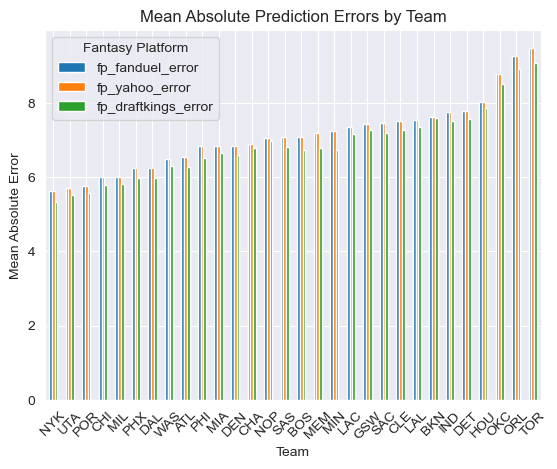

<Figure size 1400x800 with 0 Axes>

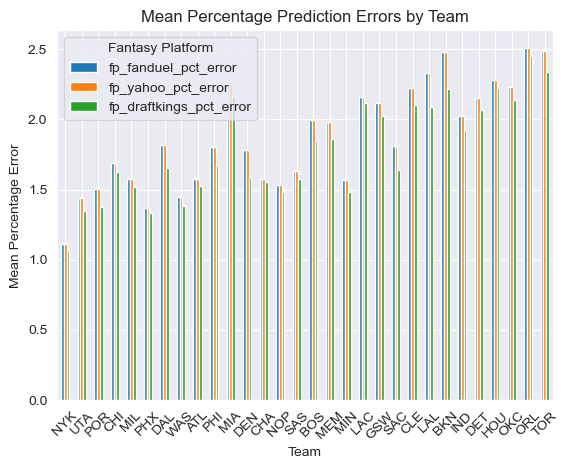

In [17]:
plt.figure(figsize=(14, 8))
team_errors_sorted[['fp_fanduel_error', 'fp_yahoo_error', 'fp_draftkings_error']].plot(kind='bar')
plt.title('Mean Absolute Prediction Errors by Team')
plt.xlabel('Team')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.legend(title='Fantasy Platform')
plt.show()

# Plot mean percentage errors by team
plt.figure(figsize=(14, 8))
team_errors_sorted[['fp_fanduel_pct_error', 'fp_yahoo_pct_error', 'fp_draftkings_pct_error']].plot(kind='bar')
plt.title('Mean Percentage Prediction Errors by Team')
plt.xlabel('Team')
plt.ylabel('Mean Percentage Error')
plt.xticks(rotation=45)
plt.legend(title='Fantasy Platform')
plt.show()

## Group by position

## Group by perforamnce

In [18]:
df['pts_cluster'] = pd.cut(df['pts'], bins=[-float('inf'), 5, 10, 20, float('inf')],
                           labels=['<5', '5-10', '10-20', '>20'])

# Repeat for other categories
df['reb_cluster'] = pd.cut(df['reb'], bins=[-float('inf'), 5, 10, 20, float('inf')],
                           labels=['<3', '3-7', '7-12', '>12'])
df['ast_cluster'] = pd.cut(df['ast'], bins=[-float('inf'), 5, 10, 20, float('inf')],
                           labels=['<3', '3-7', '7-12', '>12'])
df['stl_cluster'] = pd.cut(df['stl'], bins=[-float('inf'), 1, 2, 3, float('inf')],
                           labels=['<1', '1-2', '2-3', '>3'])
df['blk_cluster'] = pd.cut(df['blk'], bins=[-float('inf'), 1, 2, 3, float('inf')],
                           labels=['<1', '1-2', '2-3', '>3'])
df['to_cluster'] = pd.cut(df['to'], bins=[-float('inf'), 1, 2, 3, float('inf')],
                          labels=['<1', '1-2', '2-3', '>3'])
df['fp_fanduel_cluster'] = pd.cut(df['fp_fanduel'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                  labels=['<10', '10-20', '20-30', '>30'])
df['fp_yahoo_cluster'] = pd.cut(df['fp_yahoo'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                labels=['<10', '10-20', '20-30', '>30'])
df['fp_draftkings_cluster'] = pd.cut(df['fp_draftkings'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                     labels=['<10', '10-20', '20-30', '>30'])


C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

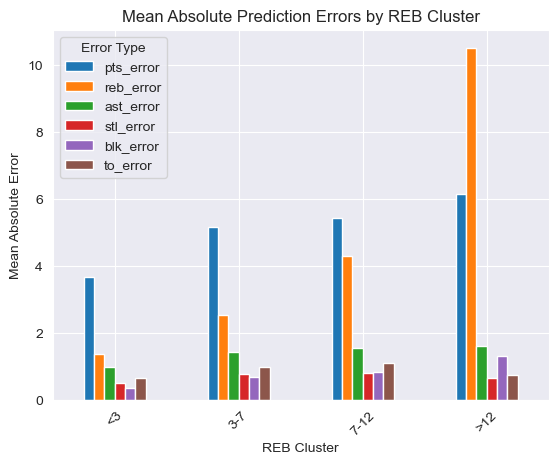

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

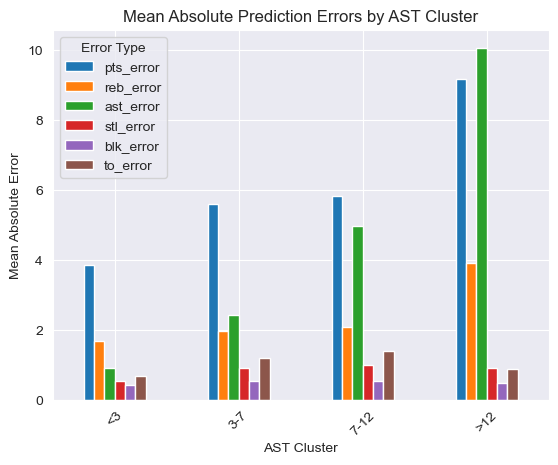

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

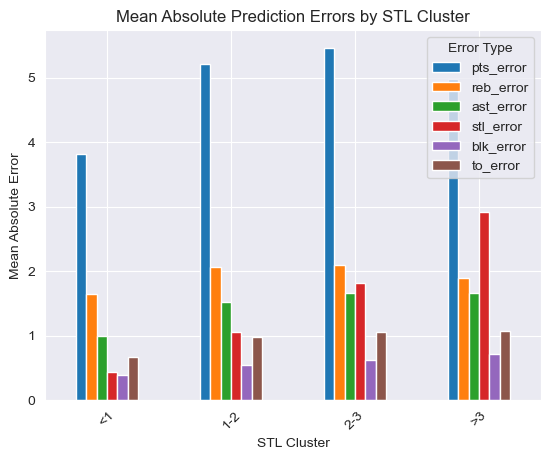

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

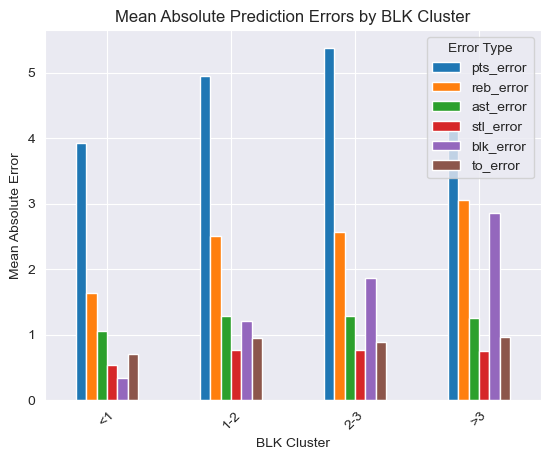

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

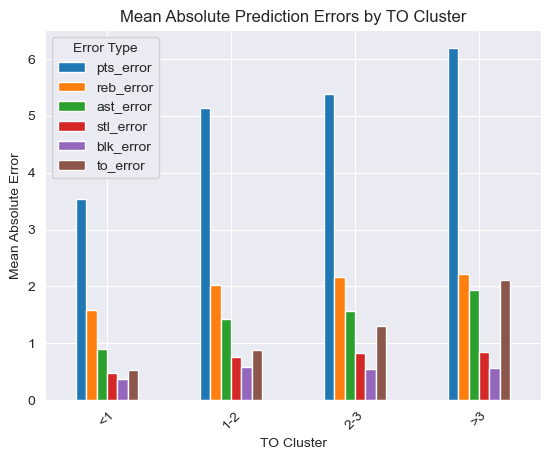

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

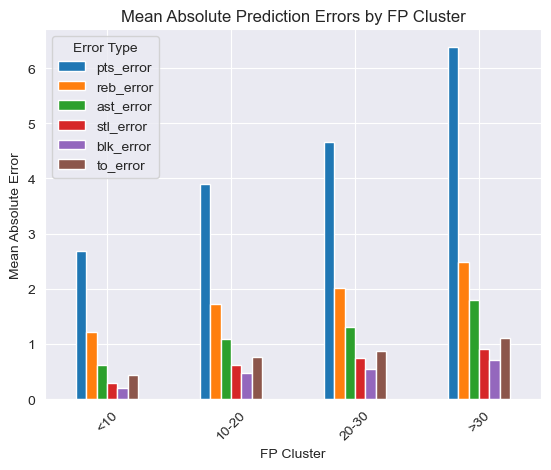

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

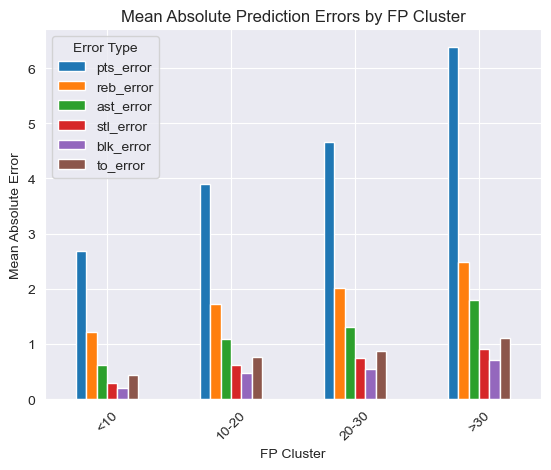

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

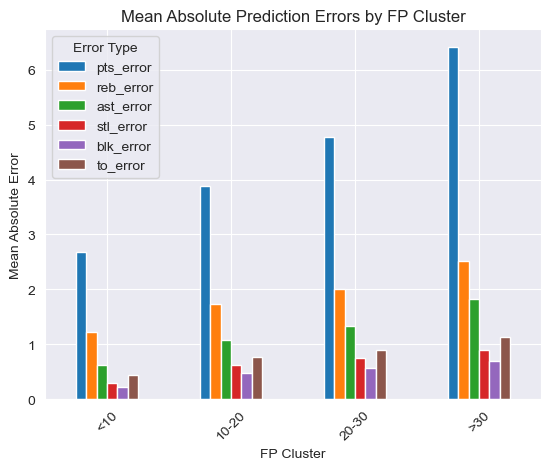

In [24]:
clusters = ['reb_cluster',
'ast_cluster',
'stl_cluster',
'blk_cluster',
'to_cluster',
'fp_fanduel_cluster',
'fp_yahoo_cluster',
'fp_draftkings_cluster',]

for cluster in clusters:
    cluster_name = cluster.split('_')[0].upper()
    cluster_errors = df.groupby(cluster).mean()[[
    'pts_error', 'reb_error', 'ast_error', 'stl_error', 'blk_error', 'to_error',
    'fp_fanduel_error', 'fp_yahoo_error', 'fp_draftkings_error',
    'pts_pct_error', 'reb_pct_error', 'ast_pct_error', 'stl_pct_error', 'blk_pct_error', 'to_pct_error',
    'fp_fanduel_pct_error', 'fp_yahoo_pct_error', 'fp_draftkings_pct_error'
]]
    
    plt.figure(figsize=(14, 8))
    cluster_errors[['pts_error', 'reb_error', 'ast_error', 'stl_error', 'blk_error', 'to_error']].plot(kind='bar')
    plt.title(f'Mean Absolute Prediction Errors by {cluster_name} Cluster')
    plt.xlabel(f'{cluster_name} Cluster')
    plt.ylabel('Mean Absolute Error')
    plt.xticks(rotation=45)
    plt.legend(title='Error Type')
    plt.show()



## Group by cluster